In [1]:
import os
import h5py
import os.path as osp

# Path to the HDF5 file
out_file_dino = osp.join("/media/ekoller/T7/Features2D/dino_segmentation", "DinoV2", "patch_32_18", "avg", "fcf66d9e-622d-291c-84c2-bb23dfe31327.h5")
out_file_proj = osp.join("/media/ekoller/T7/Features2D/projection", "DinoV2", "patch_32_18", "median", "02b33dfb-be2b-2d54-92d2-cd012b2b3c40.h5")
out_file_segmentation = osp.join("/media/ekoller/T7/Segmentation", "DinoV2", "objects", "0cac7652-8d6f-2d13-8f0e-a1dd07a8a847.h5")
# Initialize an empty dictionary to store the features
features = {}

# # Open the HDF5 file for reading
# with h5py.File(out_file_proj, 'r') as hdf_file:
#     # Iterate over each object ID (which corresponds to the dataset keys)
#     for object_key in hdf_file.keys():
#         # Read the dataset corresponding to the object_key
#         stacked_features = hdf_file[object_key][:]
        
#         # Convert the string key back to the original object_id if necessary
#         object_id = object_key
        
#         # Store the feature list in the dictionary
#         features[object_id] = [stacked_features[i] for i in range(stacked_features.shape[0])]

# # Now, you can access features[obj_id] as a list of feature vectors
# # Print the contents to verify everything is correct

# print("stuff for the projection file")
# for object_id, feature_list in features.items():
#     print(f"Object ID: {object_id}")
#     for i, feature_vector in enumerate(feature_list):
#         print(f"  Feature vector {i}: {feature_vector}")






# features_proj = {}

# with h5py.File(out_file_dino, 'r') as hdf_file:
#     # Iterate over each frame_idx (which corresponds to the groups in the HDF5 file)
#     for frame_idx in hdf_file.keys():
#         # Initialize a dictionary for each frame_idx
#         features_proj[frame_idx] = {}
        
#         # Access the group corresponding to the current frame_idx
#         frame_group = hdf_file[frame_idx]
        
#         # Iterate over each object_id within the current frame_idx group
#         for object_key in frame_group.keys():
#             # Convert object_key back to object_id if necessary
#             object_id = object_key
        
#             # Retrieve the feature vector from the dataset
#             feature_vector = frame_group[object_key][:]
            
#             # Store the feature vector in the dictionary under the object_id
#             features_proj[frame_idx][object_id] = feature_vector

# # Now, you can access features[frame_idx][object_id] to get the feature vector
# # Print the contents to verify everything is correct
# print("stuff for the dino segmentation")
# for frame_idx, object_dict in features_proj.items():
#     print(f"Frame Index: {frame_idx}")
#     for object_id, feature_vector in object_dict.items():
#         print(f"  Object ID: {object_id}")
#         print(f"    Feature Vector: {feature_vector.shape}")


#for the segmentation thing
# Initialize the features dictionary
features_seg = {}
# Open the HDF5 file in read mode ('r')
with h5py.File(out_file_segmentation, 'r') as hdf_file:
    for frame_idx in hdf_file.keys():
        # Initialize boxlist for current frame
        bounding_boxes = []
        
        # Get info
        frame_group = hdf_file[frame_idx]
        
        # Iterate over each bounding box
        for bbox_key in frame_group.keys():
            bbox_group = frame_group[bbox_key]
            
            # Get the object ID
            object_id = bbox_group.attrs['object_id']
            
            # Get the bounding box
            bbox = bbox_group['bbox'][:]
            
            # Get the mask
            mask = bbox_group['mask'][:]
            
            # Append to list
            bounding_boxes.append({
                'object_id': object_id,
                'bbox': bbox,
                'mask': mask
            })
        
        # Store it to the corresponding frame
        features_seg[frame_idx] = bounding_boxes

# # Print features to debug
# for frame_idx, boxes in features_seg.items():
#     print(f"Frame: {frame_idx}")
#     for box in boxes:
#         print(f"  Object ID: {box['object_id']}")
#         print(f"  BBox: {box['bbox']}")
#         print(f"  Mask Shape: {box['mask'].shape}")


print(features_seg["000003"])







[{'object_id': 1, 'bbox': array([300, 180,  90,  90], dtype=int32), 'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}, {'object_id': 2, 'bbox': array([150, 120, 150, 240], dtype=int32), 'mask': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}, {'object_id': 11, 'bbox': array([600,  30, 360, 510], dtype=int32), 'mask': array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 225, 225, 225],
       [  0,   0,   0, ..., 225, 225, 225],
       [  0,   0,   0, ..., 225, 225, 225]], dtype=uint8)}, {'object_id': 3, 'bbox': array([300, 300,

this codesegment accesses everything and creates the tables

In [13]:
#look at the mask data
import pickle
import numpy as np
import pandas as pd
import os.path as osp
import os.path as osp
import sys
final_precision = []
final_recall = []
final_f1 = []

# Access the contents
filepath = "/media/ekoller/T7/Results/avg/new_obj_0.45.pkl"
with open(filepath, 'rb') as file:
    result = pickle.load(file)

cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
cosine_metric_f1 = result.get("cosine_mectric_f1", None)
final_precision.extend(cosine_iou_metric_precision)
final_recall.extend(cosine_iou_metric_recall)
final_f1.extend(cosine_metric_f1)

filepath = "/media/ekoller/T7/Results/avg/new_obj_45.90.pkl"
with open(filepath, 'rb') as file:
    result = pickle.load(file)

cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
cosine_metric_f1 = result.get("cosine_mectric_f1", None)
final_precision.extend(cosine_iou_metric_precision)
final_recall.extend(cosine_iou_metric_recall)
final_f1.extend(cosine_metric_f1)


filepath = "/media/ekoller/T7/Results/avg/new_obj_90.135.pkl"
with open(filepath, 'rb') as file:
    result = pickle.load(file)

cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
cosine_metric_f1 = result.get("cosine_mectric_f1", None)
final_precision.extend(cosine_iou_metric_precision)
final_recall.extend(cosine_iou_metric_recall)
final_f1.extend(cosine_metric_f1)

filepath = "/media/ekoller/T7/Results/avg/new_obj_135.180.pkl"
with open(filepath, 'rb') as file:
    result = pickle.load(file)

cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
cosine_metric_f1 = result.get("cosine_mectric_f1", None)
final_precision.extend(cosine_iou_metric_precision)
final_recall.extend(cosine_iou_metric_recall)
final_f1.extend(cosine_metric_f1)

# Print to check the values
# print("Cosine IoU Metric Precision:", np.mean(cosine_iou_metric_precision, axis=0))
# print("Cosine IoU Metric Recall:", np.mean(cosine_iou_metric_recall, axis=0))
# print("Cosine Metric F1:", np.mean(cosine_metric_f1, axis= 0))

final_precision = np.mean(final_precision, axis=0)
final_recall = np.mean(final_recall, axis=0)
final_f1= np.mean(final_f1, axis= 0)

k_means=  [1,3,5,7,9] #[1,3,5,7,9,11,13]
threshold= [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9] #[-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9]

# Create a DataFrame for each metric
df_precision = pd.DataFrame(final_precision, index=threshold, columns=k_means)
df_recall = pd.DataFrame(final_recall, index=threshold, columns=k_means)
df_f1 = pd.DataFrame(final_f1, index=threshold, columns=k_means)

df_precision = df_precision[df_precision.index != 0.9]
df_recall = df_recall[df_recall.index != 0.9]
df_f1 = df_f1[df_f1.index != 0.9]

# Set index and column labels for better readability
df_precision.index.name = 'Cosine Threshold'
df_precision.columns.name = 'K-NN'

df_recall.index.name = 'Cosine Threshold'
df_recall.columns.name = 'K-NN'

df_f1.index.name = 'Cosine Threshold'
df_f1.columns.name = 'K-NN'

# Set Pandas options to display without wrapping
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Make display width flexible
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping


# Display the tables
print("Precision AVG")
print(df_precision)
print("\nRecall AVG")
print(df_recall)
print("\nF1 AVG")
print(df_f1)



# Find the location (index and column) of the maximum F1 score
max_f1_value = df_f1.max().max()  # Get the maximum F1 score
max_f1_location = df_f1.stack().idxmax()  # Get the corresponding index (threshold) and column (k-means)

# Extract the threshold and k-value
best_threshold, best_k_value = max_f1_location

# Print the results
print(f"The highest F1 score is {max_f1_value:.4f}, achieved at threshold {best_threshold} and K-Means value {best_k_value}.")


Precision AVG
K-NN                     1         3         5         7         9
Cosine Threshold                                                  
0.0               0.517427  0.520778  0.533166  0.533732  0.535335
0.1               0.517427  0.520778  0.533166  0.533732  0.535335
0.2               0.517428  0.520779  0.533174  0.533757  0.535368
0.3               0.518079  0.521605  0.534507  0.535435  0.537311
0.4               0.528444  0.533982  0.549267  0.552369  0.556172
0.5               0.576289  0.585013  0.602881  0.613575  0.620217
0.6               0.662270  0.673104  0.691144  0.700041  0.705973
0.7               0.728774  0.732469  0.740636  0.740660  0.740584
0.8               0.649457  0.614237  0.582480  0.553797  0.523975

Recall AVG
K-NN                     1         3         5         7         9
Cosine Threshold                                                  
0.0               0.533096  0.537517  0.543083  0.541347  0.541064
0.1               0.533096  0.537517

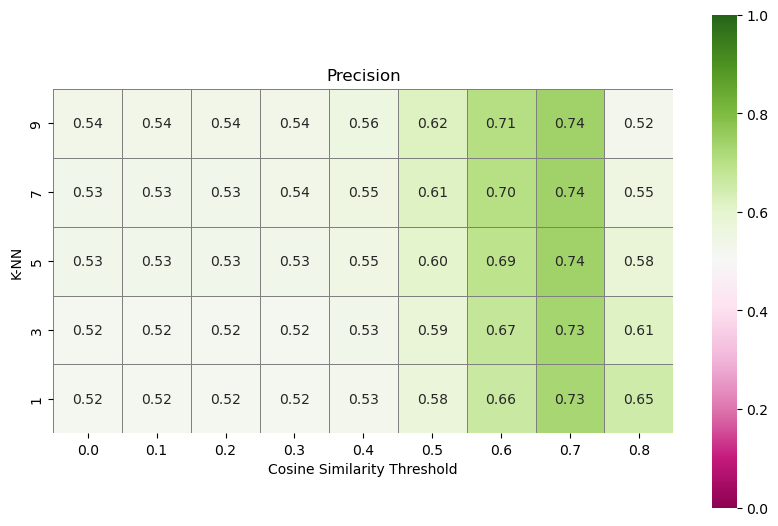

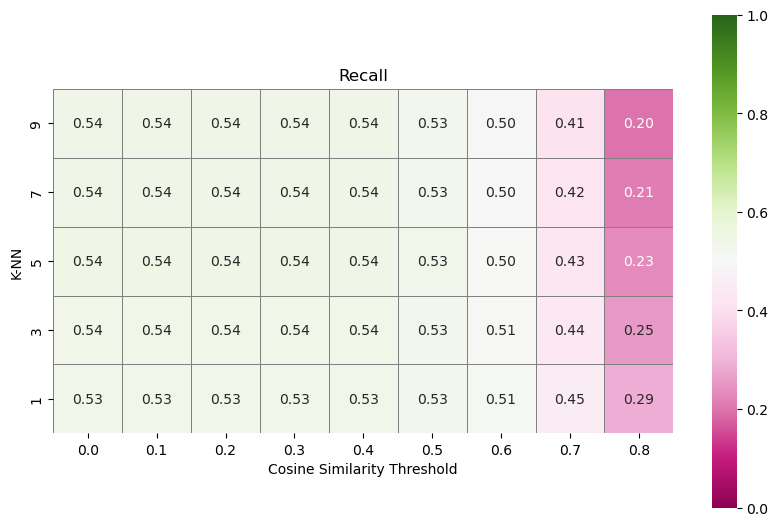

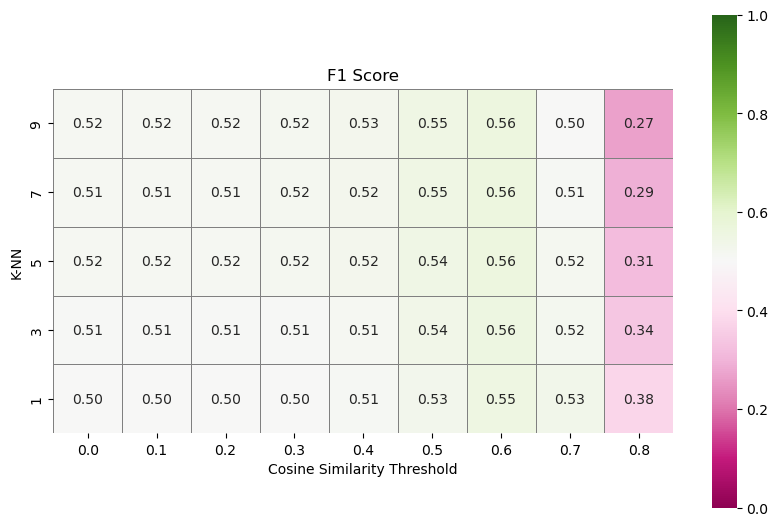

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(dataframe, title):
    plt.figure(figsize=(10, 8))
    # Transpose the DataFrame to flip axes
    sns.heatmap(dataframe.T, annot=True, fmt=".2f", cmap='PiYG', 
                cbar=True, square=True, linewidths=0.5, linecolor='gray', 
                vmin=0, vmax=1, cbar_kws={"shrink": 0.8})  # Adjust shrink here
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Cosine Similarity Threshold')  # X-axis represents the original rows
    plt.ylabel('K-NN')   # Y-axis represents the original columns
    
    # Invert the y-axis to position the corner at the top-left
    plt.gca().invert_yaxis()
    
    plt.show()

def plot_heatmap_distance(dataframe, title):
    plt.figure(figsize=(10, 8))
    # Transpose the DataFrame to flip axes
    sns.heatmap(dataframe.T, annot=True, fmt=".2f", cmap='PiYG_r',  # Reverse colormap
                cbar=True, square=True, linewidths=0.5, linecolor='gray', 
                vmin=0, vmax=2.5, cbar_kws={"shrink": 0.8})  # Adjust shrink here
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Cosine Similarity Threshold')  # X-axis represents the original rows
    plt.ylabel('K-NN')   # Y-axis represents the original columns
    
    # Invert the y-axis to position the corner at the top-left
    plt.gca().invert_yaxis()
    
    plt.show()

plot_heatmap(df_precision, 'Precision')
plot_heatmap(df_recall, 'Recall')
plot_heatmap(df_f1, 'F1 Score')


In [3]:
final_precision_2 = []
final_recall_2 = []
final_f1_2 = []
# Access the contents
# filepath = "/media/ekoller/T7/Results_2/avg/statistics_segmentation_0to60.pkl"
# with open(filepath, 'rb') as file:
#     result = pickle.load(file)

# cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
# cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
# cosine_metric_f1 = result.get("cosine_mectric_f1", None)
# final_precision_2.extend(cosine_iou_metric_precision)
# final_recall_2.extend(cosine_iou_metric_recall)
# final_f1_2.extend(cosine_metric_f1)


filepath = "/media/ekoller/T7/Results/avg/final_test_statistics.pkl"
with open(filepath, 'rb') as file:
    result = pickle.load(file)

cosine_iou_metric_precision = result.get("cosine_iou_metric_precision", None)
cosine_iou_metric_recall = result.get("cosine_iou_metric_recall", None)
cosine_metric_f1 = result.get("cosine_mectric_f1", None)
final_precision_2.extend(cosine_iou_metric_precision)
final_recall_2.extend(cosine_iou_metric_recall)
final_f1_2.extend(cosine_metric_f1)



# # Print to check the values
# print("Cosine IoU Metric Precision:", np.mean(cosine_iou_metric_precision, axis=0))
# print("Cosine IoU Metric Recall:", np.mean(cosine_iou_metric_recall, axis=0))
# print("Cosine Metric F1:", np.mean(cosine_metric_f1, axis= 0))

final_precision_2 = np.mean(final_precision_2, axis=0)
final_recall_2 = np.mean(final_recall_2, axis=0)
final_f1_2= np.mean(final_f1_2, axis= 0)

k_means= [5] #[1,3,5,7,9,11,13]
threshold= [0.6] #[-0.1,-0.2,-0.3,-0.4]

# Create a DataFrame for each metric
df_precision = pd.DataFrame(final_precision_2, index=threshold, columns=k_means)
df_recall = pd.DataFrame(final_recall_2, index=threshold, columns=k_means)
df_f1 = pd.DataFrame(final_f1_2, index=threshold, columns=k_means)




# Set index and column labels for better readability
df_precision.index.name = 'Threshold'
df_precision.columns.name = 'K-Means'

df_recall.index.name = 'Threshold'
df_recall.columns.name = 'K-Means'

df_f1.index.name = 'Threshold'
df_f1.columns.name = 'K-Means'

# Set Pandas options to display without wrapping
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Make display width flexible
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping


# Display the tables
print("Precision AVG")
print(df_precision)
print("\nRecall AVG")
print(df_recall)
print("\nF1 AVG")
print(df_f1)



# Find the location (index and column) of the maximum F1 score
max_f1_value = df_f1.max().max()  # Get the maximum F1 score
max_f1_location = df_f1.stack().idxmax()  # Get the corresponding index (threshold) and column (k-means)

# Extract the threshold and k-value
best_threshold, best_k_value = max_f1_location

# Print the results
print(f"The highest F1 score is {max_f1_value:.4f}, achieved at threshold {best_threshold} and K-Means value {best_k_value}.")


Precision AVG
K-Means           5
Threshold          
0.0        0.538801

Recall AVG
K-Means           5
Threshold          
0.0        0.538791

F1 AVG
K-Means           5
Threshold          
0.0        0.517315
The highest F1 score is 0.5173, achieved at threshold 0.0 and K-Means value 5.


In [2]:
#look at the mask data
import pickle
import os.path as osp
import os.path as osp
import sys
ws_dir = '/local/home/ekoller/BT'
print(ws_dir)
sys.path.append(ws_dir)
from utils import evaluation, scan3r


data_dir ='/local/home/ekoller/R3Scan'
data_path=  osp.join(data_dir, "Results","mask_metric/mask_metric.pkl" )


# with open(data_path, 'rb') as file:
#     data = pickle.load(file)  # This loads the dictionary from the pickle file

# # Assuming 'data' is a dictionary where keys are scan IDs and values are numbers
# # Sort by the values in descending order
# sorted_data = sorted(data.items(), key=lambda x: x[1], reverse=True)
# ref_ids = []
# # Print the sorted scan IDs and their corresponding numbers
# for scan_id, number in sorted_data:
#     ref_id = scan3r.get_reference_id()
#     ref_ids.append(ref_id)
#     print(f"Scan ID: {scan_id}, Number: {number} , Reference Id{ref_id}")

scan_id = "0cac75f0-8d6f-2d13-8d86-371deca33bb4"
 #access gt pointcenters
pklfile = osp.join(data_dir, 'files', 'orig', 'data', '{}.pkl'.format(scan_id))

with open(pklfile, "rb") as f:
    # Load the data from the pickle file
    data = pickle.load(f)
    
# extract object points and IDs from the pickle data
gt_ids = data['objects_id']
gt_centers = data["object_centers"]
gt_boxes = data['bounding_boxes']

print(gt_ids)
print(gt_centers)
print(gt_boxes)




/local/home/ekoller/BT
Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
{1.0: array([ 0.48778215, -2.2227864 , -1.311532  ], dtype=float32), 2.0: array([-0.8165765 , -3.03687   , -0.78502166], dtype=float32), 3.0: array([-1.1759152 , -3.328752  ,  0.17441119], dtype=float32), 4.0: array([-0.533804  , -4.0798655 , -0.54956096], dtype=float32), 5.0: array([-2.0876634, -2.4069846, -0.0249024], dtype=float32), 6.0: array([-1.980719  , -2.4873707 , -0.05275032], dtype=float32), 7.0: array([-1.7865872 , -2.677355  , -0.23320776], dtype=float32), 8.0: array([-1.9496969 , -1.5317907 ,  0.31452855], dtype=float32), 9.0: array([-1.7468864 , -1.7880152 , -0.75204885], dtype=float32), 10.0: array([-0.96203333, -0.70390165, -0.38595074], dtype=float32), 11.0: array([-0.7046183 ,  0.2868

In [5]:
  #return an object with the structure:scan_id: frame_number: frame_obj_id: matched id
import os
import h5py
import os.path as osp
def check_for_id_zero(matching_data):
    # Iterate through each frame in the matching data
    for frame_idx, matches in matching_data.items():
        # Check if any object is mapped to 0 in this frame
        for obj_id, mapped_id in matches.items():
            if mapped_id < 0:
                print(f"Object ID {obj_id} in frame {frame_idx} is mapped to ID new obj.")
                return True  # If found, exit early

    print("No object is mapped to ID 0.")
    return False

def read_matching_data( scan_id):
    # get the file and iterate through everything to create an object
    matchfile = osp.join("/media/ekoller/T7/Predicted_Matches", scan_id + ".h5")
    with h5py.File(matchfile, 'r') as hdf_file:
        loaded_matches = {}
        
        # Iterate through frame indices
        for frame_idx in hdf_file.keys():
            matches = {}
            
            # Access the group for each frame index
            frame_group = hdf_file[frame_idx]
            
            # Load the frame_id -> obj mappings
            for frame_id in frame_group.keys():
                obj = frame_group[frame_id][()]
                matches[frame_id] = int(obj)  # Convert back to int
            
            loaded_matches[frame_idx] = matches 

    return loaded_matches


matching_data = read_matching_data("fcf66d8a-622d-291c-8429-0e1109c6bb26")
print("matching data", matching_data["000000"])
found_id_zero = check_for_id_zero(matching_data)



No object is mapped to ID 0.
